In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install imblearn
!pip install lightgbm

In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel, VarianceThreshold
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

seed = 1
random.seed(seed)
np.random.seed(seed)
#是的，当你设置了 seed = 1，意味着你正在将随机数种子设置为 1。
#"C:\Users\WST\Desktop\train.csv"
train_path = "C:/Users/WST/Desktop/train.csv"
test_path = "C:/Users/WST/Desktop/testA.csv"

In [11]:
train_df = pd.read_csv(train_path, index_col=0)
test_df = pd.read_csv(test_path, index_col=0)
train_df = pd.concat([train_df, train_df['heartbeat_signals'].str.split(',', expand=True).astype(float)], axis=1)
test_df = pd.concat([test_df, test_df['heartbeat_signals'].str.split(',', expand=True).astype(float)], axis=1)
#concat里面要加个中括号这是因为需要将它们放在一个列表才能连接
#测试集和训练集会有点不一样但是数据的处理上应该都是差不多的
#asis表示按列进行分割，如果没有写就是哦人进行列变化
#astype(float)转化成浮点类型
#expand=True展开成多列
#heartbeat_signals的一大堆数据都是一列的
train_df.drop('heartbeat_signals', axis=1, inplace=True)
test_df.drop('heartbeat_signals', axis=1, inplace=True)
print(test_df.head())
print(test_df.index)
#如果要对列进行操作那么就要加axis=1，如果不加就默认行变化
# 如果要再原基础的Dataframe上做出改变那么也需要加上inplace=True
y = train_df["label"].values
#转化为数组
# print(y)
selector = VarianceThreshold()
#Feature1  Feature2  Feature3
#    1.2       0.8       1.3
#    1.5       0.7       1.2
#    1.3       0.9       1.1
#    1.4       0.8       1.4  按列进行比较，就是一列一列进行比较，第一列的数据进行比价，如果方差很小就删除掉，第二列再自己的数据进行比较
X = train_df.drop("label", axis=1).values
X = selector.fit_transform(X)
#在 scikit-learn 中，transform() 方法通常会将数据转换为数组类型。这是因为 scikit-learn 的数据结构主要基于 numpy 数组。
# X.head()
# print(X)
train_df.head()
print(train_df.head())
# 在控制端输出的时候要加上print如果分很多个板块就不用
#VarianceThreshold因此，被删除的特征值并不会从数据中移除，而是被设置为了0，但是它们对应的列不再包含在数据集中。


             0         1         2         3         4         5         6    \
id                                                                             
100000  0.991571  1.000000  0.631816  0.136230  0.041420  0.102707  0.120854   
100001  0.607553  0.541708  0.340694  0.000000  0.090708  0.164924  0.195034   
100002  0.975273  0.671097  0.686759  0.708482  0.718660  0.716763  0.720548   
100003  0.995635  0.917025  0.521096  0.000000  0.221770  0.404100  0.490399   
100004  1.000000  0.887949  0.745565  0.531720  0.380320  0.224631  0.091148   

             7         8         9    ...      195       196       197  \
id                                    ...                                
100000  0.123428  0.107915  0.110512  ...  0.00000  0.000000  0.000000   
100001  0.168838  0.198844  0.153579  ...  0.38996  0.386932  0.367251   
100002  0.701656  0.596579  0.487027  ...  0.00000  0.000000  0.000000   
100003  0.527158  0.518056  0.545192  ...  0.00000  0.000000  0.00000

Exception in thread Thread-9 (_readerthread):
Traceback (most recent call last):
  File "d:\anaconda3\envs\venv2\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "d:\anaconda3\envs\venv2\lib\site-packages\ipykernel\ipkernel.py", line 761, in run_closure
    _threading_Thread_run(self)
  File "d:\anaconda3\envs\venv2\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "d:\anaconda3\envs\venv2\lib\subprocess.py", line 1515, in _readerthread
    buffer.append(fh.read())
  File "d:\anaconda3\envs\venv2\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 24: invalid continuation byte
  File "d:\anaconda3\envs\venv2\lib\site-packages\joblib\externals\loky\backend\context.py", line 262, in _count_physical_cores
    cpu_info = cpu_info.stdout.splitlines()


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Score: 0.997268
Best Params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 500}
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     64327
         1.0       1.00      1.00      1.00     64327
         2.0       1.00      1.00      1.00     64327
         3.0       1.00      1.00      1.00     64327

    accuracy                           1.00    257308
   macro avg       1.00      1.00      1.00    257308
weighted avg       1.00      1.00      1.00    257308



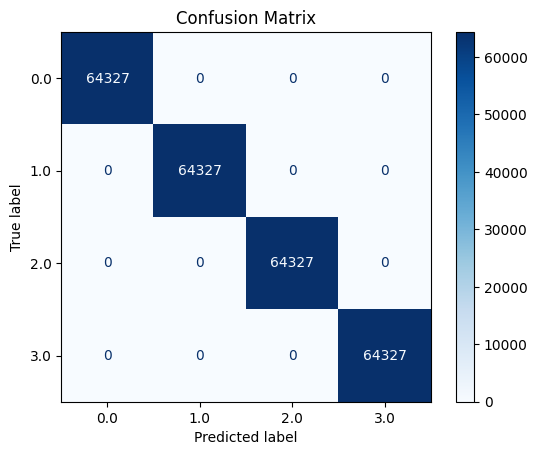

In [5]:
X = train_df.drop("label", axis=1).values
y = train_df["label"].values
#	label	0	1	2	3	4	5	6	7	8	...	195	196	197	198	199	200	201	202	203	204
# id																					
# 0	0.0	0.991230	0.943533	0.764677	0.618571	0.379632	0.190822	0.040237	0.0	0.0	0.0
# 1	0.0	0.971482	0.928969	0.572933	0.178457	0.122962	0.132360	0.094392	0.0	0.0	0.0
#二维数数据类型，取例如label就是取列就是取一个series
X_test = test_df.values


selector = VarianceThreshold()
#如果在训练集上删除了一些特征，那么相应的特征也应该在测试集上被删除，以保持模型在训练和测试阶段的一致性。
X = selector.fit_transform(X)
#fit训练模型，transform就是把方差小的删掉
X_test = selector.transform(X_test)

selector = SelectFromModel(LGBMClassifier(random_state=seed, n_jobs=-1, verbose=-1), threshold="median")
#random_state 参数的值通常可以是任何整数或者 None
#LGBMClassifier 进行预测可能会考虑到一些噪声特征
#在分类问题中，每个样本的标签数量是有限的
#自动化特征选择：使用特征分类器可以自动地评估每个特征对于任务的重要性，而不需要手动进行特征选择。特征选择器会根据分类器评估的特征重要性来选择重要的特征，从而减少了人工干预的需要。
# 基于模型的特征选择：特征选择器基于模型的方法可以更好地考虑特征之间的关系和交互，从而提高了特征选择的准确性。通过训练一个分类器来评估特征重要性，可以更好地捕获特征与目标变量之间的复杂关系。
# 模型与特征选择的整合：将特征选择器与分类器整合在一起，可以构建一个端到端的特征选择和建模流程。这样做不仅可以提高工作流程的效率，还可以确保特征选择与建模过程的一致性。



#特征选择器：
# 作用：特征选择器用于从原始特征集中选择最相关或最重要的特征子集，以用于建模任务。
# 功能：它通过分析特征之间的相关性、重要性或其他统计指标，来确定哪些特征对于预测任务最有价值。
#seed设置种子确保可重复性
#n_jobs=-1使用所有CPU进行计算
#verbose=-1模型输出时不输出任何信息
#threshold="median设置阈值为特征重要性的中位数
X = selector.fit_transform(X, y)
#SelectFromModel 是一种基于模型的特征选择方法，它会根据指定的模型（这里是 LGBMClassifier）学习每个特征的重要性，并根据重要性进行选择。在这个过程中，需要提供目标变量 y，以便模型可以学习特征与目标变量之间的关系，并根据这种关系来选择特征。
X_test = selector.transform(X_test)

sampler = SMOTE(random_state=seed, n_jobs=-1)
X, y = sampler.fit_resample(X, y)
#采取该方法进行样本合成
#在调用 fit_resample() 方法时，需要将这两个参数传递给函数，以便算法知道要对哪些特征和标签进行过采样处理。
#数据集中存在明显的类别不平衡：当数据集中的不同类别之间的样本数量差异较大时，通常会出现类别不平衡问题。例如，在二分类问题中，一个类别的样本数量远远少于另一个类别的样本数量。

# 类别不平衡导致模型预测偏差：当数据集中存在类别不平衡问题时，模型往往会倾向于预测数量较多的类别，而忽略数量较少的类别，导致模型的性能下降。

# 需要提高模型在少数类别上的预测准确率：对于一些关键类别，如罕见事件或异常情况，我们希望模型能够更好地识别和预测，从而采取针对性的措施。

# 在这些情况下，使用SMOTE算法进行过采样可以增加少数类别的样本数量，从而解决类别不平衡问题，提高模型性能和预测准确率。需要注意的是，过度使用过采样方法可能会导致过拟合问题，因此在应用SMOTE算法时需要谨慎。
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

clf = LGBMClassifier(random_state=seed, n_jobs=-1, verbose=-1)
#"n_estimators" 是随机森林中树的数量，通常来说，增加树的数量可以提高模型的性能，因为随机森林是通过多个决策树的投票来做出最终的预测，更多的树可能会产生更加稳健和准确的预测。不过，增加树的数量也会增加计算成本。因此，通常需要通过实验来确定最佳的树的数量，以在计算成本和模型性能之间取得平衡。
params = {
    "n_estimators": [500],
    "max_depth": [7],
    "learning_rate": [0.2],
}
#"learning_rate": [0.2]较小的学习率使得模型收敛更加稳定，但需要更多的树来达到相同的性能，而较大的学习率可以更快地收敛，但可能导致过拟合。
#随机森林没有学习率这个东西
#传入的时候加上中括号

grid = GridSearchCV(clf, params, scoring="accuracy", n_jobs=-1, cv=5, verbose=1)
#scoring="accuracy"一般默认就是这个
# GridSearchCV 函数通常需要指定以下参数：
# estimator: 指定要使用的模型或估算器对象。
# param_grid: 指定要搜索的超参数的候选值，以字典的形式传递。
# scoring: 指定评估模型性能的指标，例如准确率、精确率、召回率等。
# cv: 指定交叉验证的折数，用于评估模型性能。
# n_jobs: 指定用于并行计算的 CPU 核心数量。通常将其设置为 -1，表示使用所有可用核心。
# verbose: 控制输出信息的详细程度，设置为 0 表示不输出任何信息，设置为 1 表示输出进度信息，设置为大于 1 的值表示输出详细信息。
# return_train_score: 指定是否返回训练集上的得分，默认为 False，表示不返回训练集得分。
#是的，GridSearchCV 函数中参数的顺序可以调换，因为参数是通过关键字传递的，而不是通过位置传递的。因此，只要确保参数名称和参数值匹配即可
grid.fit(X, y)
print(f"Best Score: {grid.best_score_:.6f}")
print(f"Best Params: {grid.best_params_}")
clf = grid.best_estimator_
#选择最好的选择器
y_pred = clf.predict(X)
cr = classification_report(y, y_pred)
print(f"Classification Report: \n{cr}")
#它提供了关于每个类别的精确度、召回率、F1 值和支持度等指标，以及整体的加权平均指标
ConfusionMatrixDisplay.from_predictions(y, y_pred, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [8]:
pred_df = pd.DataFrame(clf.predict_proba(X_test), index=test_df.index, columns=[f"label_{i}" for i in range(4)])
print(test_df.index)
pred_df.to_csv(f"submission.csv")
pred_df.head()

Index([100000, 100001, 100002, 100003, 100004, 100005, 100006, 100007, 100008,
       100009,
       ...
       119990, 119991, 119992, 119993, 119994, 119995, 119996, 119997, 119998,
       119999],
      dtype='int64', name='id', length=20000)


,label_0,label_1,label_2,label_3
id,,,,
100000,9.999999e-01,6.441480e-08,2.022505e-11,1.422952e-12
100001,1.631247e-07,7.942244e-06,9.999919e-01,1.120933e-15
100002,1.147312e-10,8.819114e-12,1.862886e-10,1.000000e+00
100003,1.000000e+00,4.424279e-08,1.750362e-09,1.468941e-15
100004,1.000000e+00,1.599092e-08,1.967101e-08,1.705143e-11
